In [121]:
#Import all needed tools

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
import numpy as np
from qiskit.compiler import transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import MCXGate


In [122]:
#How many qubits do you want in your search space? 
k = 5

#How many simulation steps in your simulation? 
n = 7

#Create quantum registers for search space and the oracle

#Search space
register = QuantumRegister(k, name="q")

#Oracle workspace
ancilla = QuantumRegister(1, name="ancilla") 

#Classical register to save information from qubits during measurement
classical = ClassicalRegister(k, 'Classical bits')


# Create a Quantum Circuit acting on the quantum register and add the ancilla

circuit = QuantumCircuit(register, ancilla, classical)


#We need to create a uniform superposition, because qiskit prepares everything in state 0 and for some reason nothing works without this
for i in range(k): 
    circuit.h(i)

#Barrier creates clearer visualization of circuit
circuit.barrier()

In [123]:
#Multicontrol qubit
gate = MCXGate(k)

t = np.sqrt(2**k)*np.pi/2
a = 1
dt = t / n

#Create a list of qubit indices: 
qubits = []
for i in range(k): 
    qubits.append(i)

qubits.append(ancilla)

print(qubits)
for i in range(n): 
    
    #Oracle is the multicontrolled CNOT because the correct answer is 11111.
    circuit.append(gate, qubits)

    #Phase gate
    circuit.p(-a*dt, ancilla)

    #Oracle
    circuit.append(gate, qubits)


    circuit.barrier()
    
    #Driving hamiltoninan |psi><psi|
    for i in range(k): 
        circuit.h(i)
    
    for i in range(k): 
        circuit.x(i)

    circuit.append(gate, qubits)
    
    for i in range(k): 
        circuit.x(i)
    
    circuit.barrier()

    circuit.p(-a*dt, ancilla)

    circuit.barrier()

    for i in range(k):
        circuit.x(i)

    circuit.append(gate, qubits)
    
    for i in range(k): 
        circuit.x(i)
        
    for i in range(k): 
        circuit.h(i)
    
    circuit.barrier()

circuit.measure(register, classical)
circuit.draw(fold=-1)

[0, 1, 2, 3, 4, QuantumRegister(1, 'ancilla')]


┌───┐ ░                          ░ ┌───┐┌───┐     ┌───┐ ░                ░ ┌───┐     ┌───┐┌───┐ ░                          ░ ┌───┐┌───┐     ┌───┐ ░                ░ ┌───┐     ┌───┐┌───┐ ░                          ░ ┌───┐┌───┐     ┌───┐ ░                ░ ┌───┐     ┌───┐┌───┐ ░                          ░ ┌───┐┌───┐     ┌───┐ ░                ░ ┌───┐     ┌───┐┌───┐ ░                          ░ ┌───┐┌───┐     ┌───┐ ░                ░ ┌───┐     ┌───┐┌───┐ ░                          ░ ┌───┐┌───┐     ┌───┐ ░                ░ ┌───┐     ┌───┐┌───┐ ░                          ░ ┌───┐┌───┐     ┌───┐ ░                ░ ┌───┐     ┌───┐┌───┐ ░ ┌─┐            
             q_0: ┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░─┤M├────────────
                  ├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░ └╥┘┌─┐         
             q_1: ┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░──╫─┤M├─────────
                  ├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░   │                  │   ░ ├───┤├───┤  │  ├───┤ ░                ░ ├───┤  │  ├───┤├───┤ ░  ║ └╥┘┌─┐      
             q_2: ┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░───■──────────────────■───░─┤ H ├┤ X ├──■──┤ X ├─░────────────────░─┤ X ├──■──┤ X ├┤ H ├─░──╫

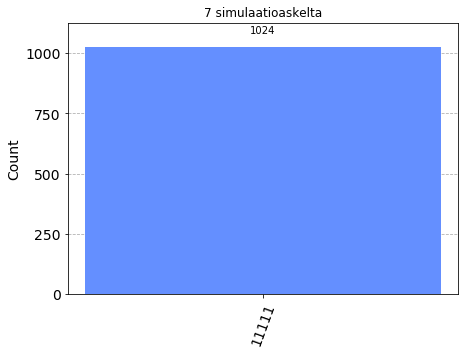

In [124]:
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(circuit, qasm_simulator)
result = qasm_simulator.run(transpiled_qc).result()

#Define the plot with a name
plot_histogram(result.get_counts(), title= f"{n} simulaatioaskelta")

